Arif Shaikh

Oasis Task- 1 : Iris flower classification

In machine learning, classification is a predictive modeling problem where the class label is anticipated for a specific example of input data. 

The iris flower problem is a classic example of a multi-class classification problem, where the goal is to predict the species of the iris flower based on its sepal length, sepal width, petal length, and petal width. There are three possible classes or categories in this problem: setosa, versicolor, and virginica.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
# Load the iris dataset from a CSV file
df = pd.read_csv('Iris.csv')

# renaming column names
df = df.rename(columns={'SepalLengthCm': 'Sepal Length', 'SepalWidthCm': 'Sepal Width', 'PetalLengthCm': 'Petal Length', 'PetalWidthCm': 'Petal Width', 'Species': 'Class'})

# to display all rows
# pd.set_option('display.max_columns',None)
df.head()


,Id,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(df.shape)

(150, 6)


In [ ]:
# dropping the first col
df = df.drop(columns=["Id"])
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# summary statistics
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# info of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# no of entries for each species
df["Class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [ ]:
# preprocess: checking for null values
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class           0
dtype: int64

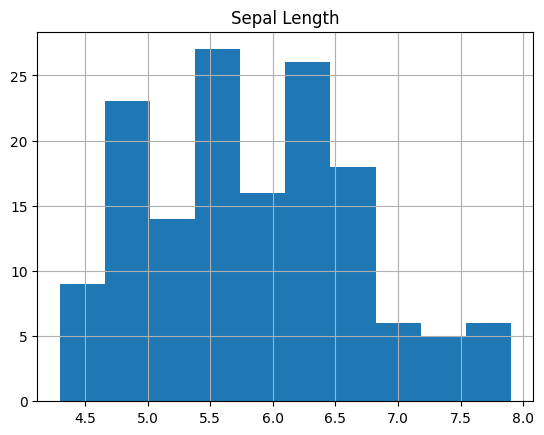

In [ ]:
# EDA
# plotting histogram of each attribute
df["Sepal Length"].hist()
plt.title("Sepal Length")
plt.show()

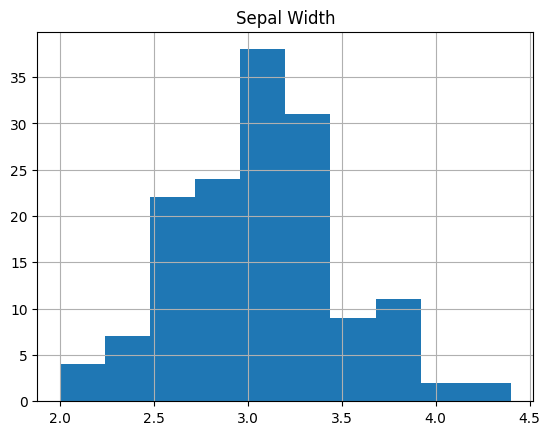

In [ ]:
df["Sepal Width"].hist()
plt.title("Sepal Width")
plt.show()
# normal distribution preferred : model can easily learn

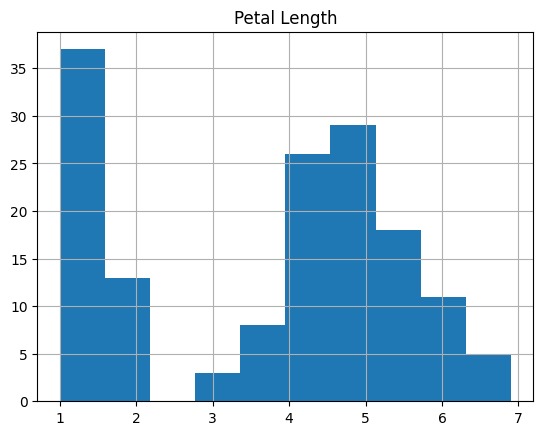

In [ ]:
df["Petal Length"].hist()
plt.title("Petal Length")
plt.show()
# we can see that the 1st species is well seperated from the other two 

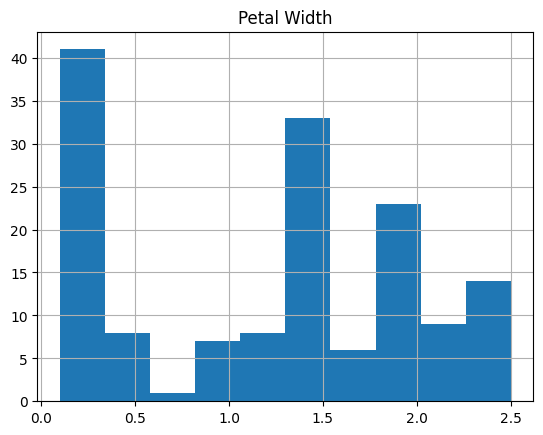

In [ ]:
df["Petal Width"].hist()
plt.title("Petal Width")
plt.show()

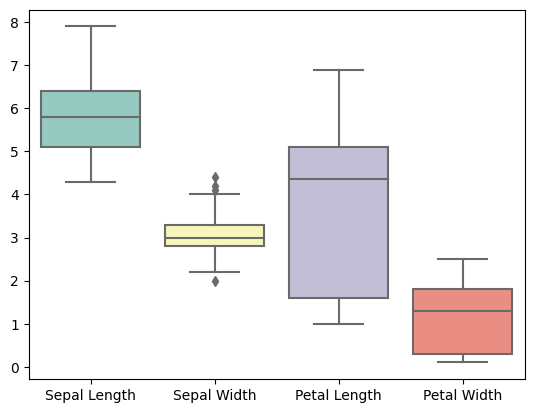

In [ ]:
# Create a boxplot for each feature to check for outliers
sns.boxplot(data=df, palette='Set3')
plt.show()

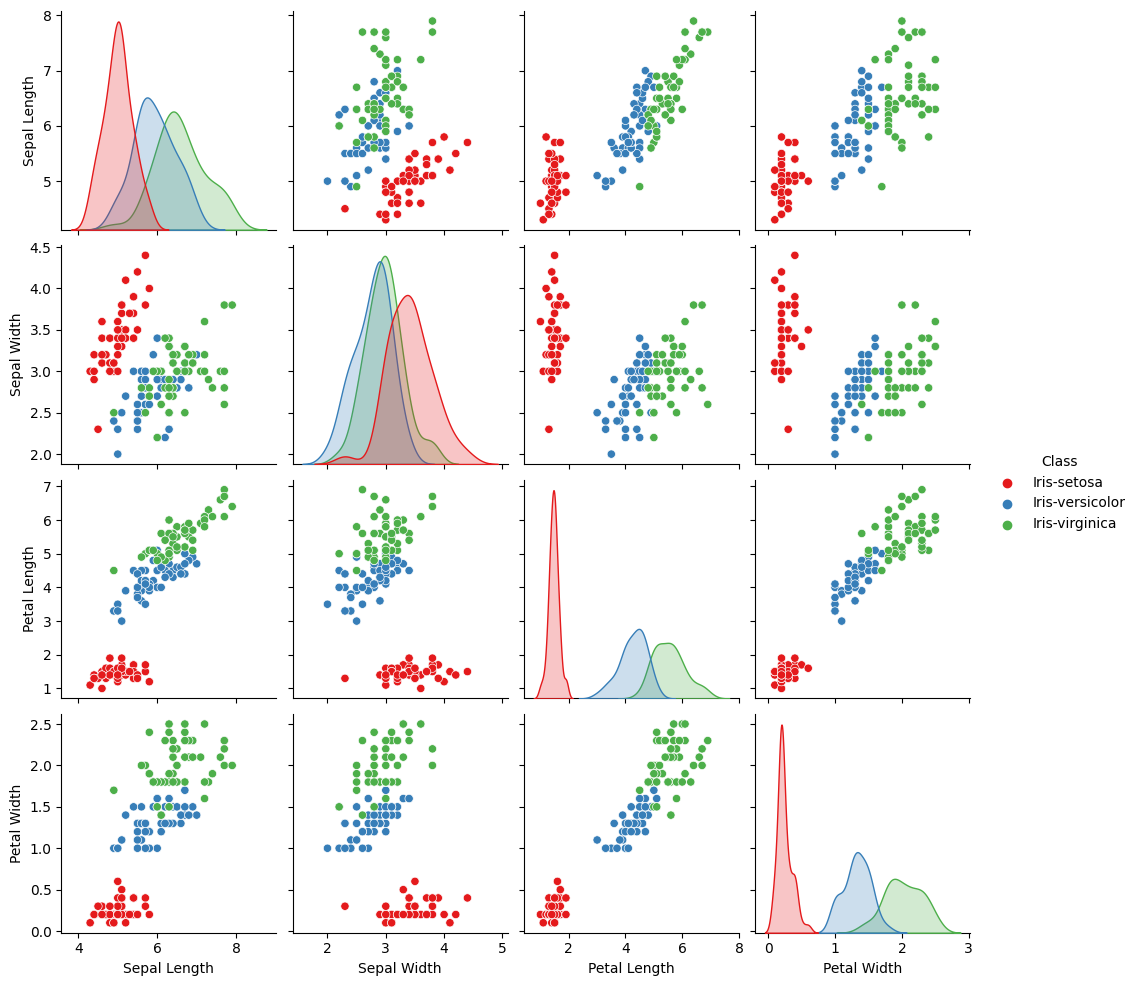

In [ ]:
# Create a pairplot for all combinations of features
sns.pairplot(data=df, hue='Class', palette='Set1')
plt.show()

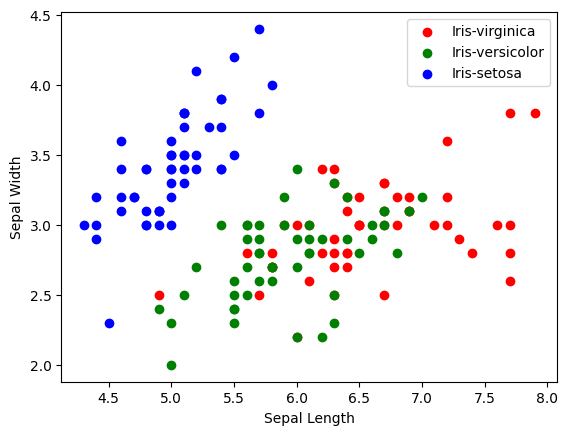

In [ ]:
# scatterplot : univarient 
colors = ['red', 'green', 'blue']
classes = ['Iris-virginica','Iris-versicolor','Iris-setosa']

for i in range(3):
    x = df[df['Class'] == classes[i]]
    plt.scatter(x['Sepal Length'], x['Sepal Width'], c = colors[i], label=classes[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

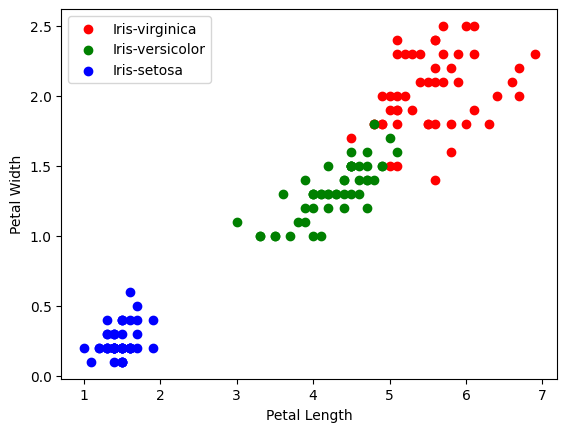

In [ ]:
for i in range(3):
    x = df[df['Class'] == classes[i]]
    plt.scatter(x['Petal Length'], x['Petal Width'], c = colors[i], label=classes[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

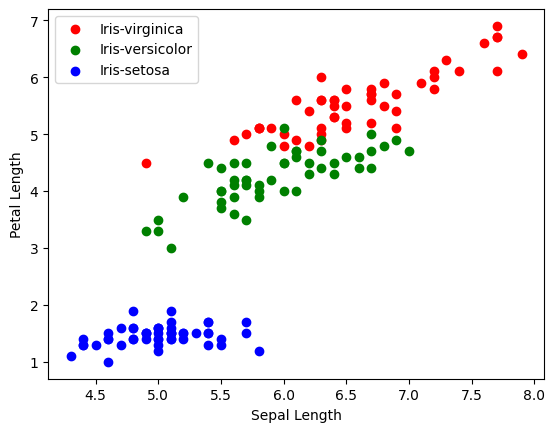

In [ ]:
for i in range(3):
    x = df[df['Class'] == classes[i]]
    plt.scatter(x['Sepal Length'], x['Petal Length'], c = colors[i], label=classes[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

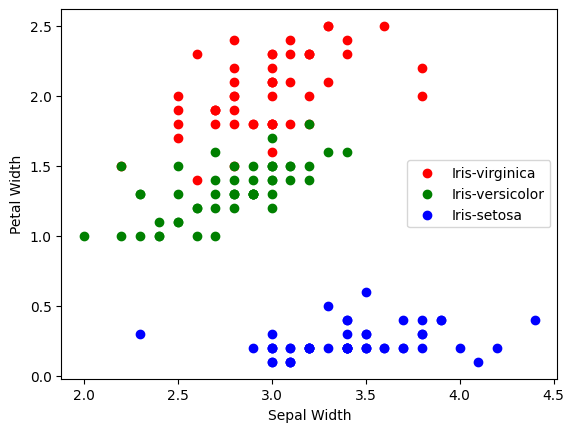

In [ ]:
for i in range(3):
    x = df[df['Class'] == classes[i]]
    plt.scatter(x['Sepal Width'], x['Petal Width'], c = colors[i], label=classes[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [ ]:
# correlation matrix
df.corr()

<ipython-input-19-a32c6888aa4e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-20-2f7cc5d141ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), cmap = "coolwarm", annot=True, linewidth=2)


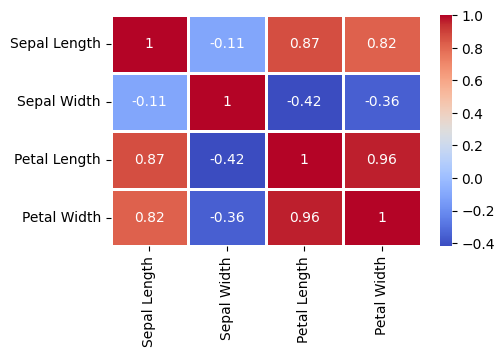

In [ ]:
plt.figure(figsize=(5,3))
ax = sns.heatmap(df.corr(), cmap = "coolwarm", annot=True, linewidth=2)
plt.show()


In [ ]:
# categorical -> numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
"""
Iris-setosa        0
Iris-versicolor    1
Iris-virginica     2
"""
df['Class']=le.fit_transform(df['Class'])
df.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
# train=75 & test=25 for validation check
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Class'])
Y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25)
print(x_train.shape)

(112, 4)


In [ ]:
# logistic reg

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

# checking for 
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  97.36842105263158


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(x_train,y_train)
print("Accuracy: ", model1.score(x_test,y_test)*100)

Accuracy:  97.36842105263158


In [ ]:
# decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(x_train,y_train)
print("Accuracy: ", model2.score(x_test,y_test)*100)

Accuracy:  91.78378378378378


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)
print("Accuracy: ", model3.score(x_test,y_test)*100)

Accuracy:  97.36842105263158


In [ ]:
from sklearn.svm import SVC
model4 = SVC(kernel='rbf')
model4.fit(x_train,y_train)
print("Accuracy: ", model4.score(x_test,y_test)*100)

Accuracy:  94.73684210526315


In [ ]:
import xgboost
model5 = xgboost.XGBRegressor()
model5.fit(x_train,y_train)
print("Accuracy: ", model5.score(x_test,y_test)*100)

Accuracy:  91.5346963605929


In [ ]:
# cross validation

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=x_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    return r2_val_score.mean()

In [ ]:
model = LogisticRegression()
# Call the test_model function to get the accuracy score using cross validation
accuracy = test_model(model)
print("Accuracy:", accuracy*100)

Accuracy: 94.61522541734257


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model1 = KNeighborsClassifier()
accuracy = test_model(model1)
print("Accuracy:", accuracy*100)

Accuracy: 97.32313575525812


In [ ]:
# decision Tree regressor
model2 = DecisionTreeRegressor()
accuracy = test_model(model2)
print("Accuracy:", accuracy*100)

Accuracy: 93.11629608115413


In [ ]:
model3 = RandomForestClassifier()
accuracy = test_model(model3)
print("Accuracy:", accuracy*100)

Accuracy: 93.27679329497164


In [ ]:
model4 = SVC(kernel='rbf')
accuracy = test_model(model4)
print("Accuracy:", accuracy*100)

Accuracy: 95.8242064190697


In [ ]:
model5 = xgboost.XGBRegressor()
accuracy = test_model(model5)
print("Accuracy:", accuracy*100)

Accuracy: 93.60903053338843


We have completed this classification problem using 5 different models and checked it's accuracy(coefficient of determination R^2) we also tested its accuracy(mean  R^2 score) using cross-validation which evaluate the performance of a model in a more robust way by considering its performance on different subsets of the data. Furture the accuracy can be increased using hyperparameter tuning.